In [388]:
#Machine Learning Homework 1
#Tommy Yu    CNetID: yulp
#Apr 4, 2017

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [390]:
#Data date range: Apr 1, 2016 to Mar 31, 2017

#Extract useful data from raw data
graffiti_raw = pd.read_csv('311_Service_Requests_-_Graffiti_Removal.csv', index_col='Service Request Number')
potholes_raw = pd.read_csv('311_Service_Requests_-_Pot_Holes_Reported.csv', index_col='SERVICE REQUEST NUMBER')
sanitation_raw = pd.read_csv('311_Service_Requests_-_Sanitation_Code_Complaints.csv', index_col='Service Request Number')
buildings_raw = pd.read_csv('311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv', index_col='SERVICE REQUEST NUMBER') 

graffiti = graffiti_raw[['Creation Date', 'Completion Date', 'Type of Service Request', 'What Type of Surface is the Graffiti on?', 'Community Area', 'Latitude', 'Longitude']]
graffiti.columns = ['Creation', 'Completion', 'Type', 'Subtype', 'Community', 'LAT', 'LON']

potholes = potholes_raw[['CREATION DATE','COMPLETION DATE', 'TYPE OF SERVICE REQUEST', 'Community Area', 'LATITUDE', 'LONGITUDE']]
potholes.columns = ['Creation', 'Completion', 'Type', 'Community', 'LAT', 'LON']

sanitation = sanitation_raw[['Creation Date', 'Completion Date', 'Type of Service Request', 'What is the Nature of this Code Violation?', 'Community Area', 'Latitude', 'Longitude']]
sanitation.columns = ['Creation', 'Completion', 'Type', 'Subtype', 'Community', 'LAT', 'LON']

buildings = buildings_raw[['DATE SERVICE REQUEST WAS RECEIVED', 'SERVICE REQUEST TYPE', 'Community Area', 'LATITUDE', 'LONGITUDE']]
buildings.columns = ['Creation', 'Type', 'Community', 'LAT', 'LON']

#Concatenate into one single dataframe
frames = [graffiti, potholes, sanitation, buildings]
result = pd.concat(frames)

#Calculate response time
result['Completion'] = pd.to_datetime(result['Completion'])
result['Creation'] = pd.to_datetime(result['Creation'])
result['Response'] = result['Completion'] - result['Creation']

#Match community area code with name of the neighborhood
community = pd.read_csv('CommAreas.csv')
result = pd.merge(result, community, on='Community')
result = result.drop('Community',1)

is_graffiti = result['Type'] == 'Graffiti Removal'
is_potholes = result['Type'] == 'Pothole in Street'
is_sanitation = result['Type'] == 'Sanitation Code Violation'
is_buildings = result['Type'] == 'Vacant/Abandoned Building'

In [391]:
result

,Completion,Creation,LAT,LON,Subtype,Type,Response,Neighborhood
0,2016-04-01,2016-04-01,41.968020,-87.738210,Brick - Painted,Graffiti Removal,0 days,Irving Park
1,2016-04-01,2016-04-01,41.968021,-87.738128,Metal - Painted,Graffiti Removal,0 days,Irving Park
2,2016-04-01,2016-04-01,41.968022,-87.738046,Metal - Painted,Graffiti Removal,0 days,Irving Park
3,2016-04-01,2016-04-01,41.968023,-87.737963,Brick - Painted,Graffiti Removal,0 days,Irving Park
4,2016-04-01,2016-04-01,41.967327,-87.738785,Brick - Painted,Graffiti Removal,0 days,Irving Park
5,2016-04-01,2016-04-01,41.967367,-87.738843,Brick - Painted,Graffiti Removal,0 days,Irving Park
6,2016-04-01,2016-04-01,41.967406,-87.738901,Brick - Painted,Graffiti Removal,0 days,Irving Park
7,2016-04-01,2016-04-01,41.967446,-87.738959,Brick - Painted,Graffiti Removal,0 days,Irving Park
8,2016-04-01,2016-04-01,41.967485,-87.739017,Brick - Painted,Graffiti Removal,0 days,Irving Park
9,2016-04-01,2016-04-01,41.967525,-87.739074,Brick - Painted,Graffiti Removal,0 days,Irving Park


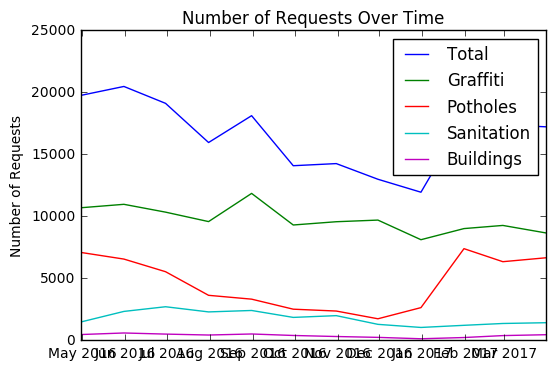

In [392]:
###PROBLEM 1###

#Summary 1: Number of requests over time

total_overtime=result.groupby(pd.Grouper(key='Creation',freq='m')).size()
plt.plot(total_overtime, label='Total')

graffiti_overtime=result[is_graffiti].groupby(pd.Grouper(key='Creation',freq='m')).size()
plt.plot(graffiti_overtime, label='Graffiti')

potholes_overtime=result[is_potholes].groupby(pd.Grouper(key='Creation',freq='m')).size()
plt.plot(potholes_overtime, label='Potholes')

sanitation_overtime=result[is_sanitation].groupby(pd.Grouper(key='Creation',freq='m')).size()
plt.plot(sanitation_overtime, label='Sanitation')

buildings_overtime=result[is_buildings].groupby(pd.Grouper(key='Creation',freq='m')).size()
plt.plot(buildings_overtime, label='Buildings')

plt.title("Number of Requests Over Time")
plt.ylabel("Number of Requests")
plt.legend(loc='best')
plt.show()

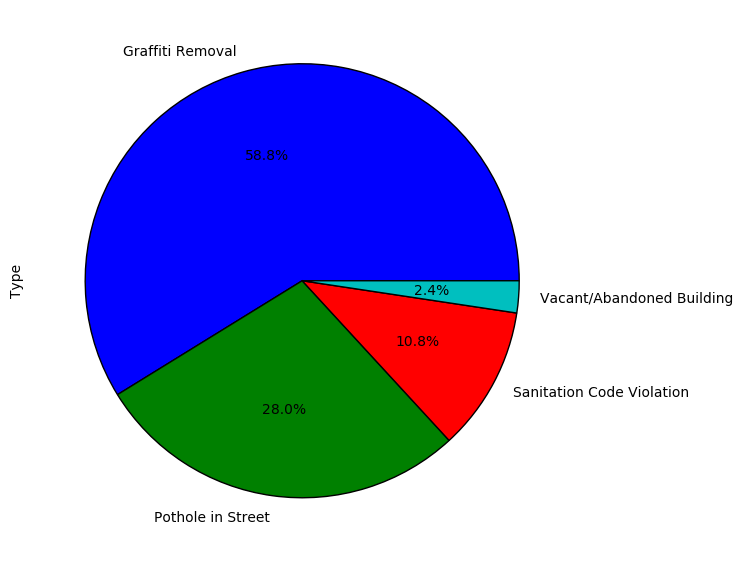

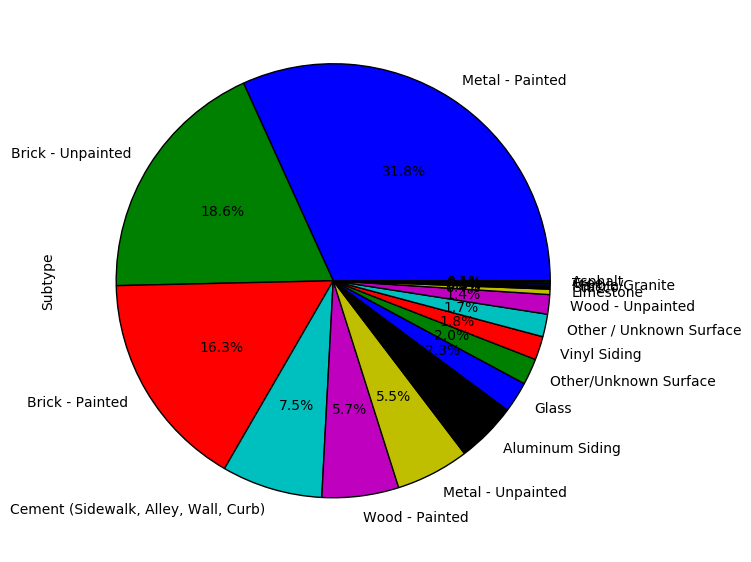

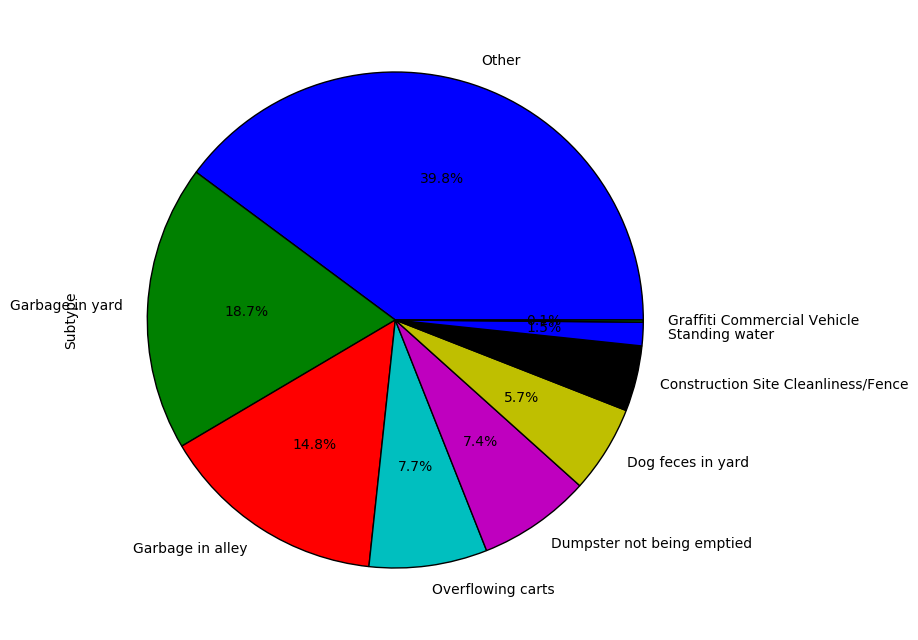

In [393]:
#Summary 2: Number of requests by type and by subtype

total_by_type = result['Type'].value_counts(normalize=True)
total_by_type.plot.pie(autopct='%.1f%%', fontsize=10, figsize=(7, 7))
plt.show()

graffiti_by_sub_type = result[is_graffiti]['Subtype'].value_counts(normalize=True)
graffiti_by_sub_type.plot.pie(autopct='%.1f%%', fontsize=10, figsize=(7, 7))
plt.show()

sanitation_by_sub_type = result[is_sanitation]['Subtype'].value_counts(normalize=True)
sanitation_by_sub_type.plot.pie(autopct='%.1f%%',fontsize=10, figsize=(8, 8))
plt.show()

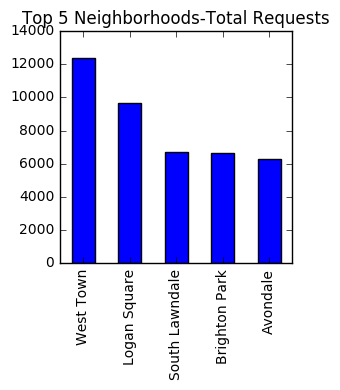

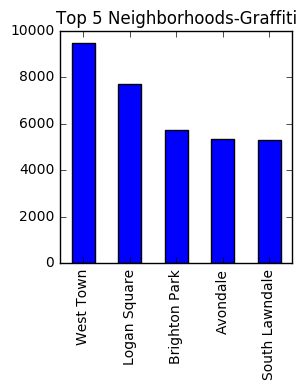

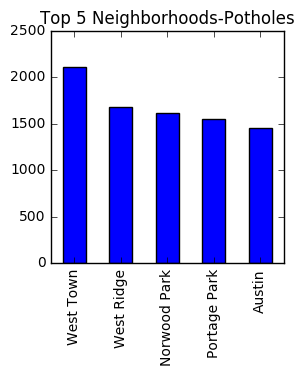

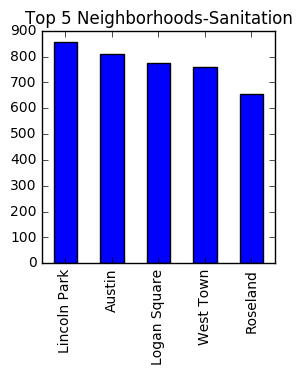

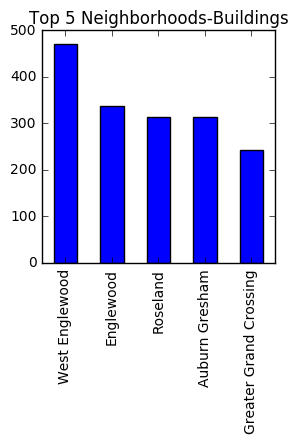

In [394]:
#Summary 3: Number of requests by neighborhood

total_by_neigh = result['Neighborhood'].value_counts()
total_by_neigh[:5].plot.bar(fontsize=10, figsize=(3,3), title="Top 5 Neighborhoods-Total Requests")
plt.show()

graffiti_by_neigh = result[is_graffiti]['Neighborhood'].value_counts()
graffiti_by_neigh[:5].plot.bar(fontsize=10, figsize=(3,3), title="Top 5 Neighborhoods-Graffiti")
plt.show()

potholes_by_neigh = result[is_potholes]['Neighborhood'].value_counts()
potholes_by_neigh[:5].plot.bar(fontsize=10, figsize=(3,3), title="Top 5 Neighborhoods-Potholes")
plt.show()

sanitation_by_neigh = result[is_sanitation]['Neighborhood'].value_counts()
sanitation_by_neigh[:5].plot.bar(fontsize=10, figsize=(3,3), title="Top 5 Neighborhoods-Sanitation")
plt.show()

buildings_by_neigh = result[is_buildings]['Neighborhood'].value_counts()
buildings_by_neigh[:5].plot.bar(fontsize=10, figsize=(3,3), title="Top 5 Neighborhoods-Buildings")
plt.show()

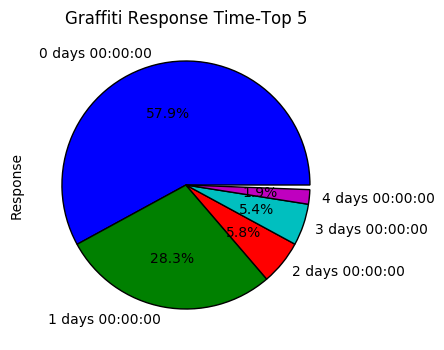

Average response time: 0 days 16:05:36.367594


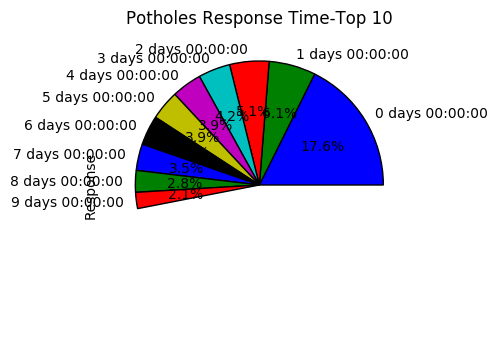

Average response time: 23 days 08:28:12.002723


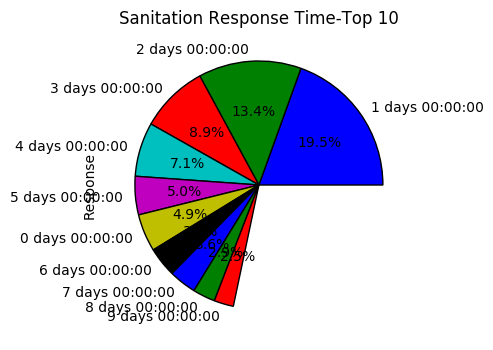

Average response time: 8 days 20:08:12.261457


In [395]:
#Summary 4: Response time by type

graffiti_time=result[is_graffiti]['Response'].value_counts(normalize=True)
graffiti_time[:5].plot.pie(autopct='%.1f%%',fontsize=10, figsize=(4, 4), title='Graffiti Response Time-Top 5')
plt.show()
print('Average response time: ' + str(result[is_graffiti]['Response'].mean()))

potholes_time=result[is_potholes]['Response'].value_counts(normalize=True)
potholes_time[:10].plot.pie(autopct='%.1f%%',fontsize=10, figsize=(4, 4), title='Potholes Response Time-Top 10')
plt.show()
print('Average response time: ' + str(result[is_potholes]['Response'].mean()))

sanitation_time=result[is_sanitation]['Response'].value_counts(normalize=True)
sanitation_time[:10].plot.pie(autopct='%.1f%%',fontsize=10, figsize=(4, 4), title='Sanitation Response Time-Top 10')
plt.show()
print('Average response time: ' + str(result[is_sanitation]['Response'].mean()))

In [ ]:
'''
Based on the above summary statistics:
Five interesting things about Chicago 311 requests over the past year:

No.1:
    The quantity of requests for graffiti removal is greater than the 3 other
    types of requests combined.

No.2:
    Sanitation requests are very diversified, with almost 40% of them
    uncategorizable (belonging to "Others").

No.3:
    Pothole requests are apparently higher in winter months than in summer months.
    Graffiti requests are in general higher in summer months than in winter months.
    Abandanoned building requests don't change much over the year.
    All of these make perfect sense.

No.4
    Contrary to my expectation, Lincoln Park generated the most sanitation-related
    requests, and West Town tops the list of graffiti removal and potholes in street.

No.5
    It takes less than a day for the city to respond to a graffiti removal
    request, 8 days to a sanitation request, and 23 days to a potholes request.
    In fact, almost 60% of graffiti removal requests are responded within the day
    of request. The difference in response time makes perfect sense too.
'''

In [311]:
###PROBLEM 2###

#Data date range: 3 months from Mar 1, 2017 to Mar 31, 2017
#Only consider Sanitation and Buildings Request

is_recent = result['Creation'] >= "2017-01-01"
result_ = result[is_recent & (is_buildings | is_sanitation)]
add = pd.DataFrame(columns=['tract','block_group'])
new_result = result_.join(add).dropna(subset=['LAT','LON']).reset_index(drop=True)

In [317]:
#request FIPS code from fcc.gov API - get tract and block group

for i in range(len(new_result)):
    lat = new_result.iloc[i]['LAT']
    lon = new_result.iloc[i]['LON']
    url_0="http://data.fcc.gov/api/block/find?latitude="+str(lat)+"&longitude="+str(lon)+"&showall=false&format=json"
    j_0 = requests.get(url_0).json()
    full_code = j_0['Block']['FIPS']
    new_result.loc[i,'tract'] = full_code[5:-4]
    new_result.loc[i,'block_group'] = full_code[-4:-3]

In [396]:
'''
Get demographics information from census api corresponding to
available tracts and block groups in the Cook County

Demographics of interest:
    Median age: B01002_001E 
    White population: B02008_001E
    Black population: B02009_001E
    Asian population: B02011_001E
    Male population: B01001_002E
    Female population: B01001_026E
    Family income: B19101_001E
'''
url = "http://api.census.gov/data/2015/acs5?get=NAME,B01002_001E,B02008_001E,B02009_001E,B02011_001E,B01001_002E,B01001_026E,B19101_001E&for=block+group:*&in=state:17+county:031&in=tract:*&key=229bf240d92590240c8e5f8e3fd1d7fce243036b"
j = requests.get(url).json()

demog = ['Median age', 'White population', 'Black population', 'Asian population', 'Male population', 'Female population', 'Family income']
headers = ['Name']+demog+['state','county','tract','block_group']

df = pd.DataFrame(j, columns=headers)
df = df.drop(["Name","state","county"], 1)
df = df.drop([0])
for attr in demog:
    df[attr]=df[attr].astype(float)

In [397]:
#merge results from the two APIs
full_result = pd.merge(new_result, df, on=['tract', 'block_group'])

In [398]:
full_result

,Completion,Creation,LAT,LON,Subtype,Type,Response,Neighborhood,tract,block_group,Median age,White population,Black population,Asian population,Male population,Female population,Family income
0,2017-01-03,2017-01-01,41.954846,-87.699491,Overflowing carts,Sanitation Code Violation,2 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0
1,2017-01-03,2017-01-01,41.954846,-87.699491,Overflowing carts,Sanitation Code Violation,2 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0
2,2017-01-03,2017-01-01,41.954553,-87.699482,Overflowing carts,Sanitation Code Violation,2 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0
3,2017-01-03,2017-01-01,41.954846,-87.699491,Other,Sanitation Code Violation,2 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0
4,2017-01-03,2017-01-01,41.954480,-87.699480,Overflowing carts,Sanitation Code Violation,2 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0
5,2017-01-03,2017-01-01,41.954553,-87.699482,Overflowing carts,Sanitation Code Violation,2 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0
6,2017-01-12,2017-01-05,41.954846,-87.699491,Overflowing carts,Sanitation Code Violation,7 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0
7,2017-01-12,2017-01-05,41.954846,-87.699491,Overflowing carts,Sanitation Code Violation,7 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0
8,2017-01-12,2017-01-09,41.954853,-87.701933,Garbage in yard,Sanitation Code Violation,3 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0
9,2017-01-18,2017-01-11,41.954480,-87.699480,Other,Sanitation Code Violation,7 days,Irving Park,160602,1,32.9,990.0,14.0,124.0,549.0,711.0,287.0


In [399]:
is_buildings = full_result['Type'] == 'Vacant/Abandoned Building'
is_sanitation = full_result['Type'] == 'Sanitation Code Violation'

def summarize(df):
    '''
    Summarize the average demographics in Jan, Feb, Mar, and from Jan to Mar.
    '''
    is_jan = (df["Creation"] >= "2017-01-01") & (df["Creation"] <= "2017-01-31")
    is_feb = (df["Creation"] >= "2017-02-01") & (df["Creation"] <= "2017-02-28")
    is_mar = (df["Creation"] >= "2017-03-01") & (df["Creation"] <= "2017-03-31")
    is_total = df["Creation"] >= "2017-01-01"
    summary = pd.DataFrame(index=['Jan','Feb','Mar','Total'], columns=demog)
    lst = [is_jan,is_feb,is_mar,is_total]
    for i in range(4):
        for attr in demog:
            summary.iloc[i][attr] = df[lst[i]][attr].mean()
    return summary

In [400]:
summary_buildings = summarize(full_result[is_buildings])
summary_buildings

,Median age,White population,Black population,Asian population,Male population,Female population,Family income
Jan,34.8281,173.877,834.991,16.8213,507.915,589.357,230.153
Feb,35.3685,190.568,879.575,17.7877,520.849,606.813,240.65
Mar,34.444,195.208,866.9,18.2646,533.063,620.638,242.837
Total,34.8596,188.927,864.561,17.781,523.233,608.902,239.308


In [401]:
summary_sanitation = summarize(full_result[is_sanitation])
summary_sanitation

,Median age,White population,Black population,Asian population,Male population,Female population,Family income
Jan,34.5489,644.549,484.978,82.9164,656.499,701.202,281.159
Feb,33.8673,666.086,483.54,87.326,681.387,703.92,282.153
Mar,34.519,599.643,491.85,96.7406,639.124,678.492,270.813
Total,34.3061,635.899,486.934,89.3377,658.789,694.045,277.815


In [ ]:
'''
Now we can answer questions based on the demographics of block groups.
(1) For blocks with vacant buildings requests, black population takes up the
majority of the population [76% = 865/(523+609)], women take up 54% of the population,
the median age is around 35 years old.

(2) For blocks with sanitation requests, white population takes up the
majority of the population [47% = 636/(659+694)], women take up 51% of the population,
the median age is around 34 years old.

(3) By looking at the comparsion among the first 3 months of 2017,
no obvious change can be spotted - within expectation. The time span is too short.

(4) Key differences b/w blocks getting the two different kinds of request:
comparing to blocks with sanitation requests, blocks with vacant building requests have
    a. a much bigger African American population
    b. a smaller Asian population
    c. a smaller total population
    d. a much lower family income
'''

In [240]:
###Problem 3###

#Question A

#Address: 7500 S Wolcott Ave belongs to Community Area: Auburn Gresham
summary_a = result[result['Neighborhood']=='Auburn Gresham']['Type'].value_counts(normalize=True)
print(summary_a)
#Therefore, pothole requests are most likely (48.8%), please see below for
#probabilities for each type.

Pothole in Street            0.488412
Sanitation Code Violation    0.275107
Vacant/Abandoned Building    0.134335
Graffiti Removal             0.102146
Name: Type, dtype: float64


In [248]:
#Question B

is_n_lawndale = result['Neighborhood']=='North Lawndale'
is_s_lawndale = result['Neighborhood']=='South Lawndale'
is_uptown = result['Neighborhood']=='Uptown'
summary_b = result[is_graffiti & (is_n_lawndale|is_s_lawndale|is_uptown)]['Neighborhood'].value_counts(normalize=True)
print(summary_b)
#Therefore, it is far more likely that the call came from Lawndale
#with a combined (South+North) probability of 76.5%.
#It is more than 50% higher than the probability of 23.5% for Uptown.

South Lawndale    0.700290
Uptown            0.235279
North Lawndale    0.064431
Name: Neighborhood, dtype: float64


In [402]:
#Question C

#Since we already know that the call comes about Graffiti Removal,
#it's all about calculating the conditional probability for the two towns

#For Englewood, p = (probability of Englewood+Graffiti)/(probability of Graffiti)
#                 = 160/(160+100) = 61.5%
#For Uptown, similary, p = 100/(160+100) = 38.5%

#Thus it's about 20% more likely that the call came from Englewood.